In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [101]:
gd=pd.read_csv("glass.csv")

In [102]:
gd

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [103]:
array=gd.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [104]:
x=array[:,0:9]
Y=array[:,9]

In [105]:
X=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)) #scaling features using minmax scaler
#no scaling for predicted variable Y

In [106]:
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [107]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [108]:
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.7384615384615385

# Choose the best value for K


In [109]:

k_range= range(1,40,2)
k_scores=[]
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    scores=accuracy_score(pred,y_test)
    k_scores.append(scores)

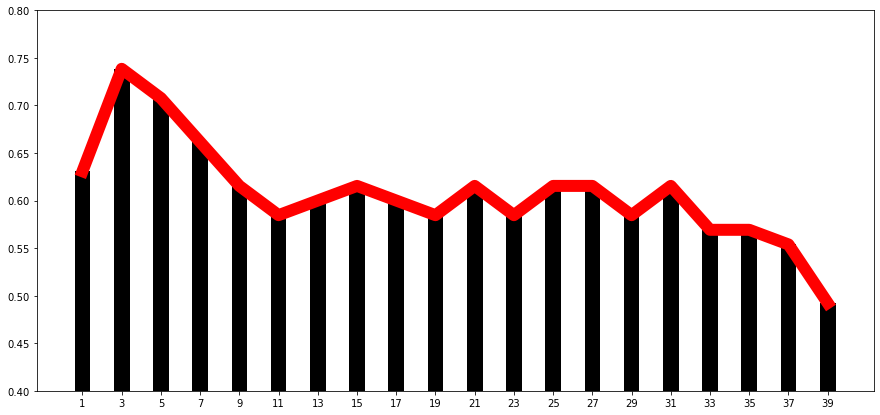

In [110]:
plt.figure(figsize=(15,7))
plt.plot(k_range,k_scores,color='red',linewidth=12)
plt.bar(k_range,k_scores,color='black')
plt.ylim(0.4,0.8)
plt.xticks(k_range)
plt.show()

In [111]:
# Thus here we can see that K=3 is the best option for the model